### Temperature Forecast Project using ML
Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv('temperature.csv')
pd.set_option('display.max_columns', None)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

The dataset has 7752 rows and 25 columns

In [4]:
#checking datatypes
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Almost all the columns in the datset are numerical along with a date column

In [5]:
#checking null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We can see that there are is significant number of null values in the dataset

In [6]:
#handling the date column
df['Date'] = pd.to_datetime(df.Date)

In [7]:
#making new columns for the values in date colum

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [8]:
#droping the date column
df.drop('Date', inplace = True, axis = 1)

In [9]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


<AxesSubplot:>

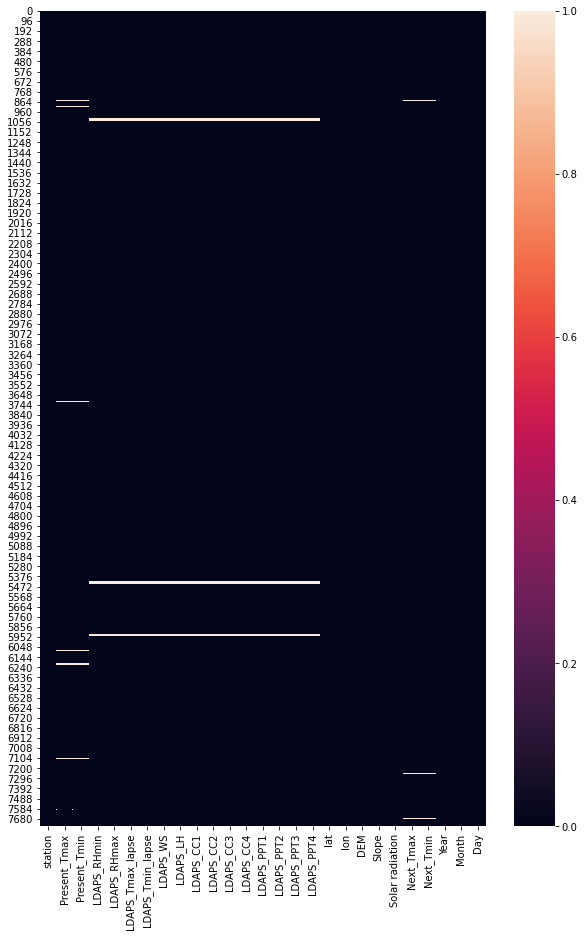

In [10]:
#plotting the null values
plt.figure(figsize=(10,15))
sns.heatmap(df.isnull())

The most missing values in the dataset seems to be in the same row

In [11]:
#droping rows with null values
df.dropna(axis=0,inplace=True)
df.shape

(7588, 27)

<AxesSubplot:>

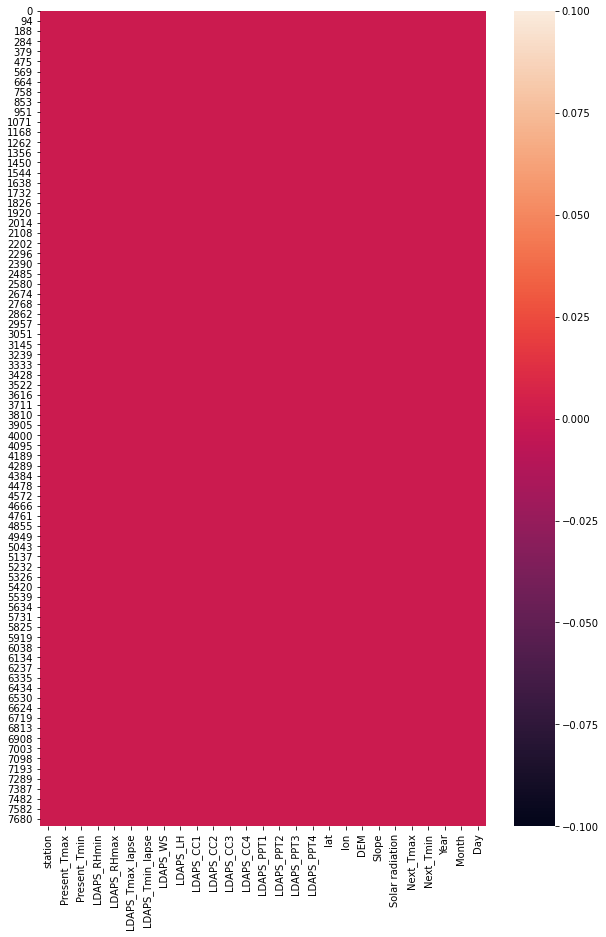

In [12]:
#plotting the null values again
plt.figure(figsize=(10,15))
sns.heatmap(df.isnull())

In [13]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day'],
      dtype='object')

25.0    307
18.0    307
2.0     307
17.0    307
10.0    307
23.0    307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
15.0    302
12.0    302
22.0    302
9.0     302
24.0    302
19.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: station, dtype: int64


<AxesSubplot:xlabel='station', ylabel='count'>

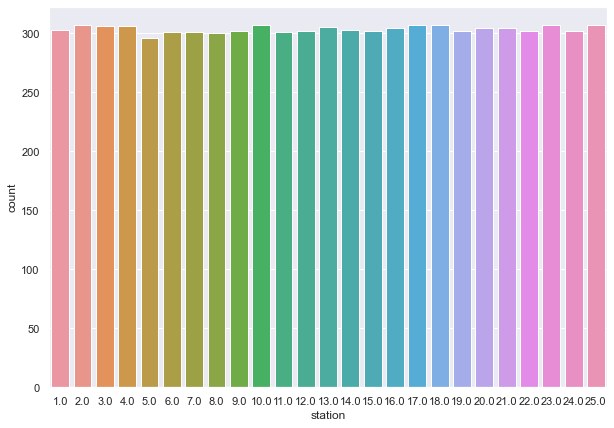

In [14]:
#checking the clumns
sns.set_theme(style="darkgrid")
print(df['station'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(df['station'])

The station number from which the data is obtained. No of stations is 25, the data seems to be extracted uniformly

31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
20.1      1
20.4      1
37.1      1
37.6      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64


<AxesSubplot:xlabel='Present_Tmax', ylabel='Count'>

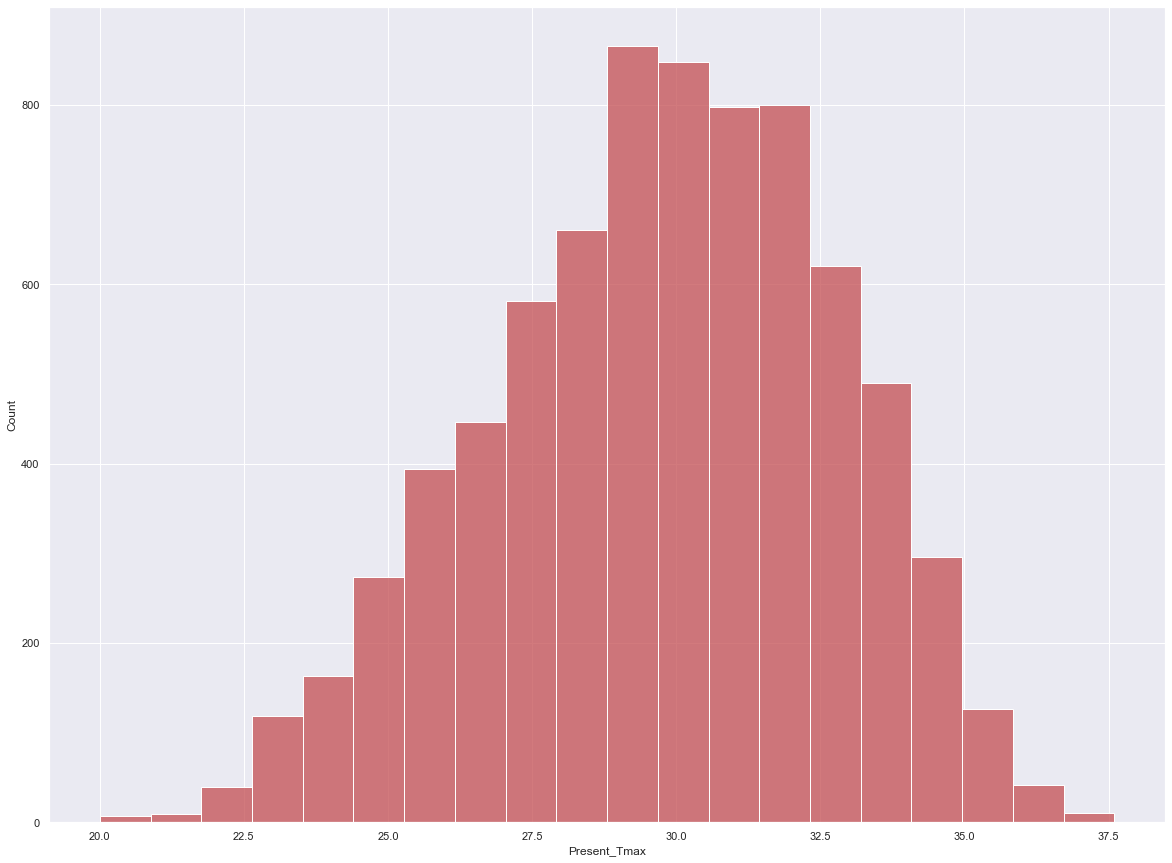

In [15]:
#checking the numerical columns
print(df['Present_Tmax'].value_counts())
plt.figure(figsize=(20,15))
##plt.xticks(rotation=-50)
sns.histplot(df['Present_Tmax'],color='r',bins=20)

Maximum air temperature between 0 and 21 h on the present day
The temperature averages around 30 degree

24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.1      1
14.2      1
29.7      1
29.9      1
11.3      1
Name: Present_Tmin, Length: 155, dtype: int64


<AxesSubplot:xlabel='Present_Tmin', ylabel='Count'>

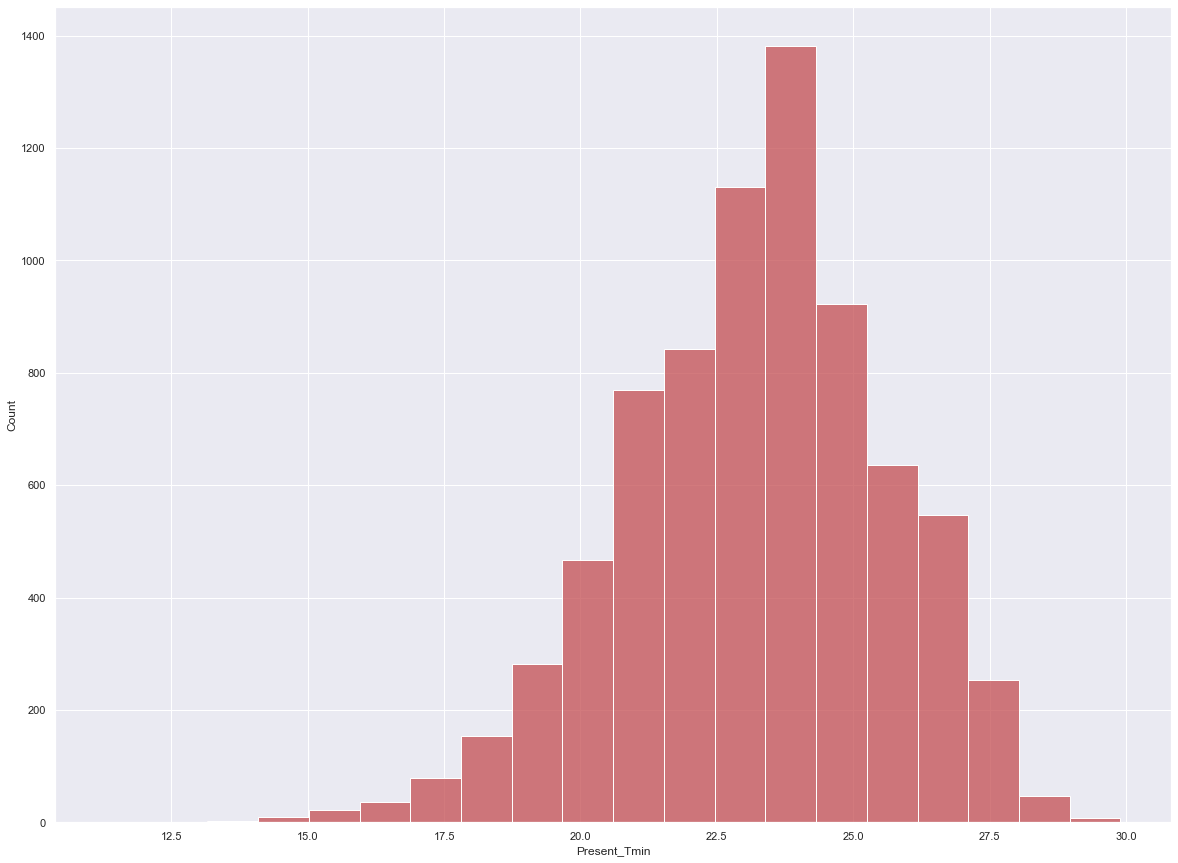

In [16]:

#checking the numerical columns
print(df['Present_Tmin'].value_counts())
plt.figure(figsize=(20,15))
##plt.xticks(rotation=-50)
sns.histplot(df['Present_Tmin'],color='r',bins=20)

The minimum temprature averages around 23 degrees

29.3    113
33.0    104
31.3    100
29.6     98
31.2     97
       ... 
38.9      1
21.4      1
20.6      1
38.7      1
18.9      1
Name: Next_Tmax, Length: 181, dtype: int64


<AxesSubplot:xlabel='Next_Tmax', ylabel='Count'>

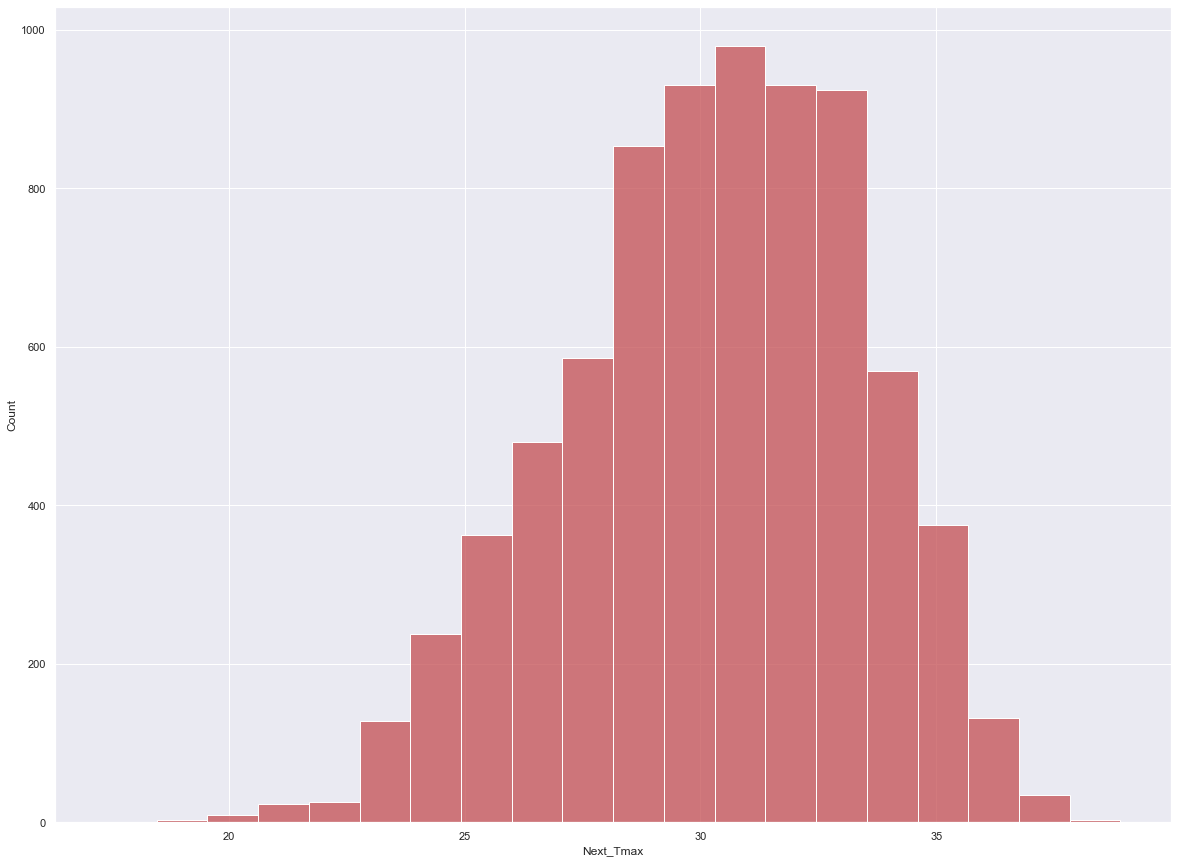

In [17]:

#checking the numerical columns
print(df['Next_Tmax'].value_counts())
plt.figure(figsize=(20,15))
##plt.xticks(rotation=-50)
sns.histplot(df['Next_Tmax'],color='r',bins=20)

The distribution for the nexday looks similar to the present day which averages arount 30 degrees

23.5    157
24.0    152
23.4    150
23.2    148
23.8    146
       ... 
28.5      1
29.8      1
13.9      1
13.6      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64


<AxesSubplot:xlabel='Next_Tmin', ylabel='Count'>

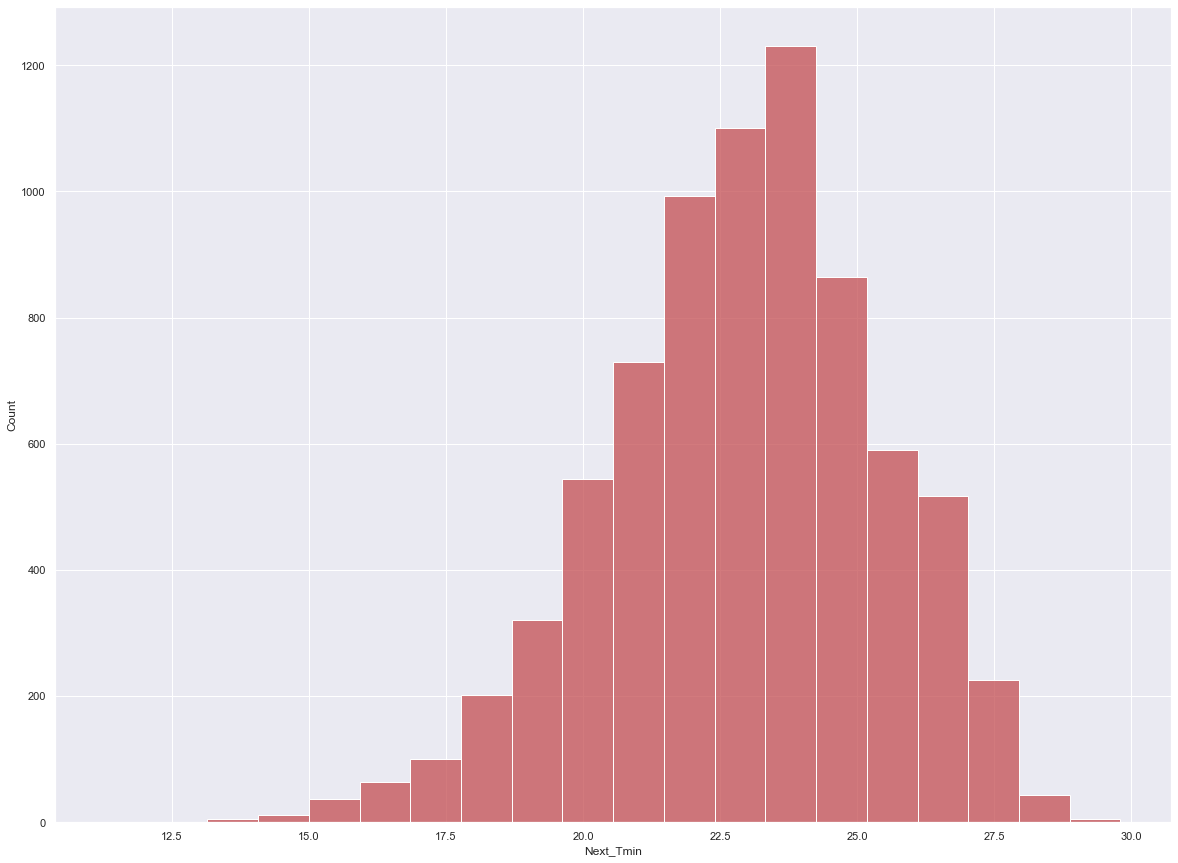

In [18]:

#checking the numerical columns
print(df['Next_Tmin'].value_counts())
plt.figure(figsize=(20,15))
##plt.xticks(rotation=-50)
sns.histplot(df['Next_Tmin'],color='r',bins=20)

The Minimum temperature looks similar to the present day, which averages around 23 degrees

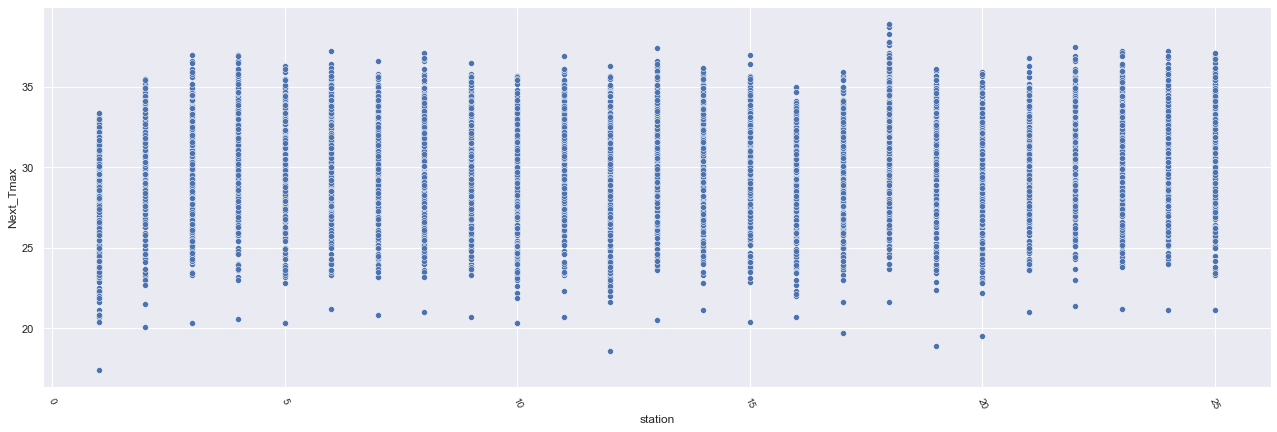

In [19]:
plt.figure(figsize = (22,7))
sns.scatterplot(y="Next_Tmax", x="station", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

The max temperature distribution amoung various stations 

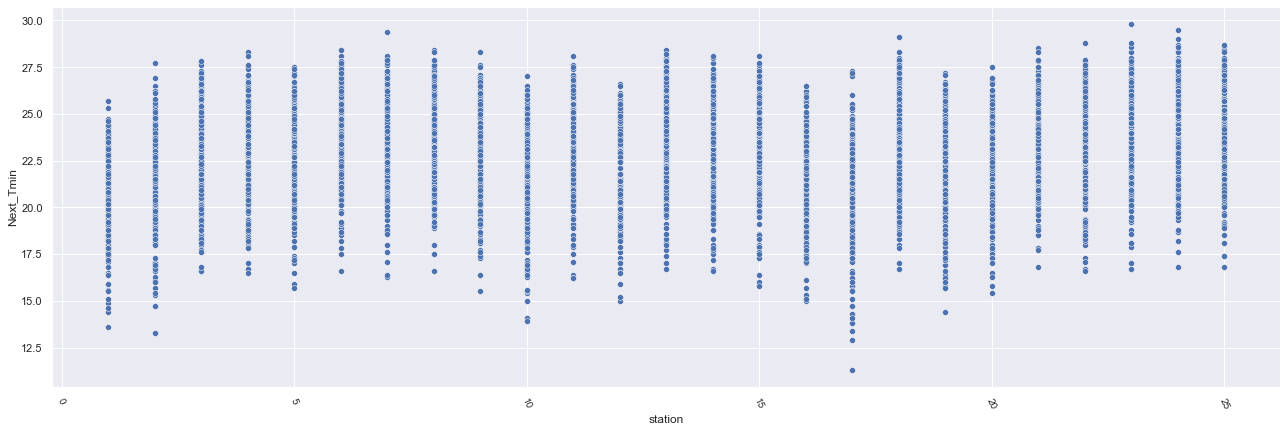

In [20]:
#minimum temperature distribution  
plt.figure(figsize = (22,7))
sns.scatterplot(y="Next_Tmin", x="station", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()                                                                                                        

Minimum temperature distribution among various station

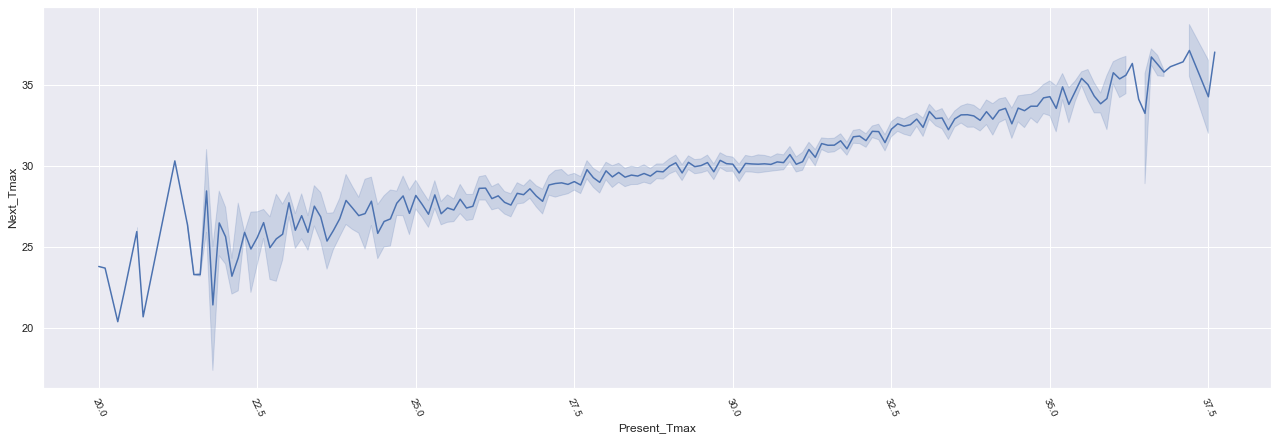

In [21]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmax", x="Present_Tmax", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

Increase in maximum temperature, from present day to next day

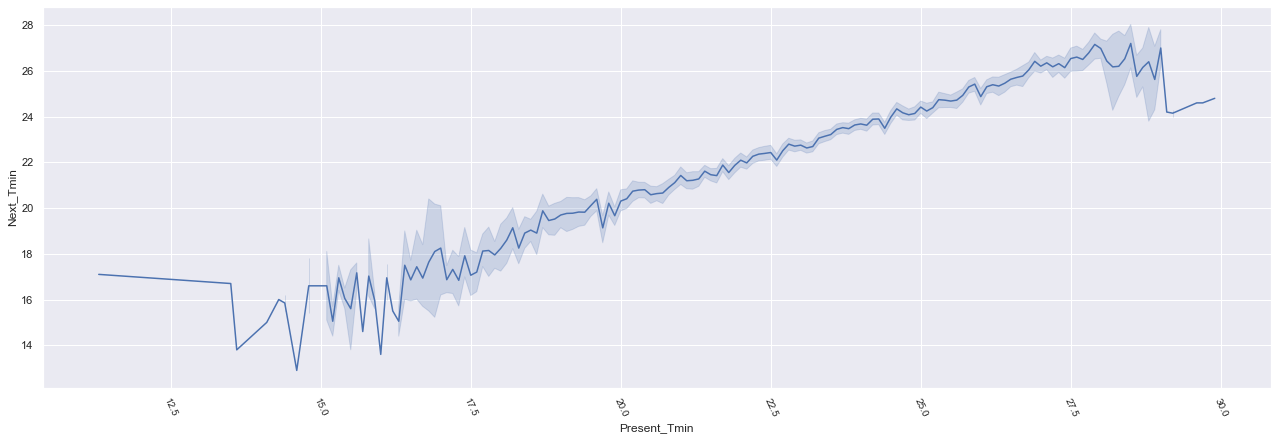

In [22]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmin", x="Present_Tmin", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

Change in minimum temperature from present day to the next day

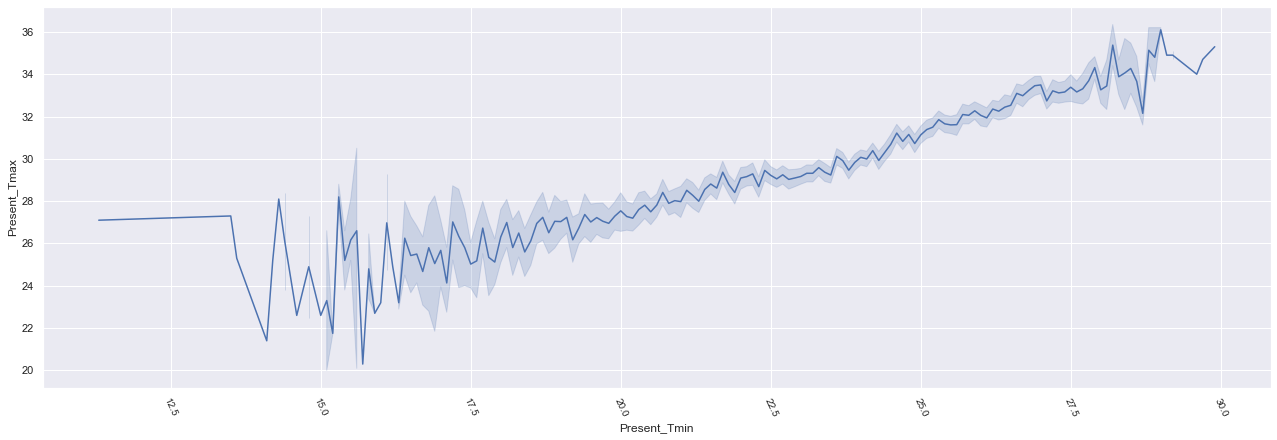

In [23]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Present_Tmax", x="Present_Tmin", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

difference in temperature on the present day,
Tmax vs Tmin

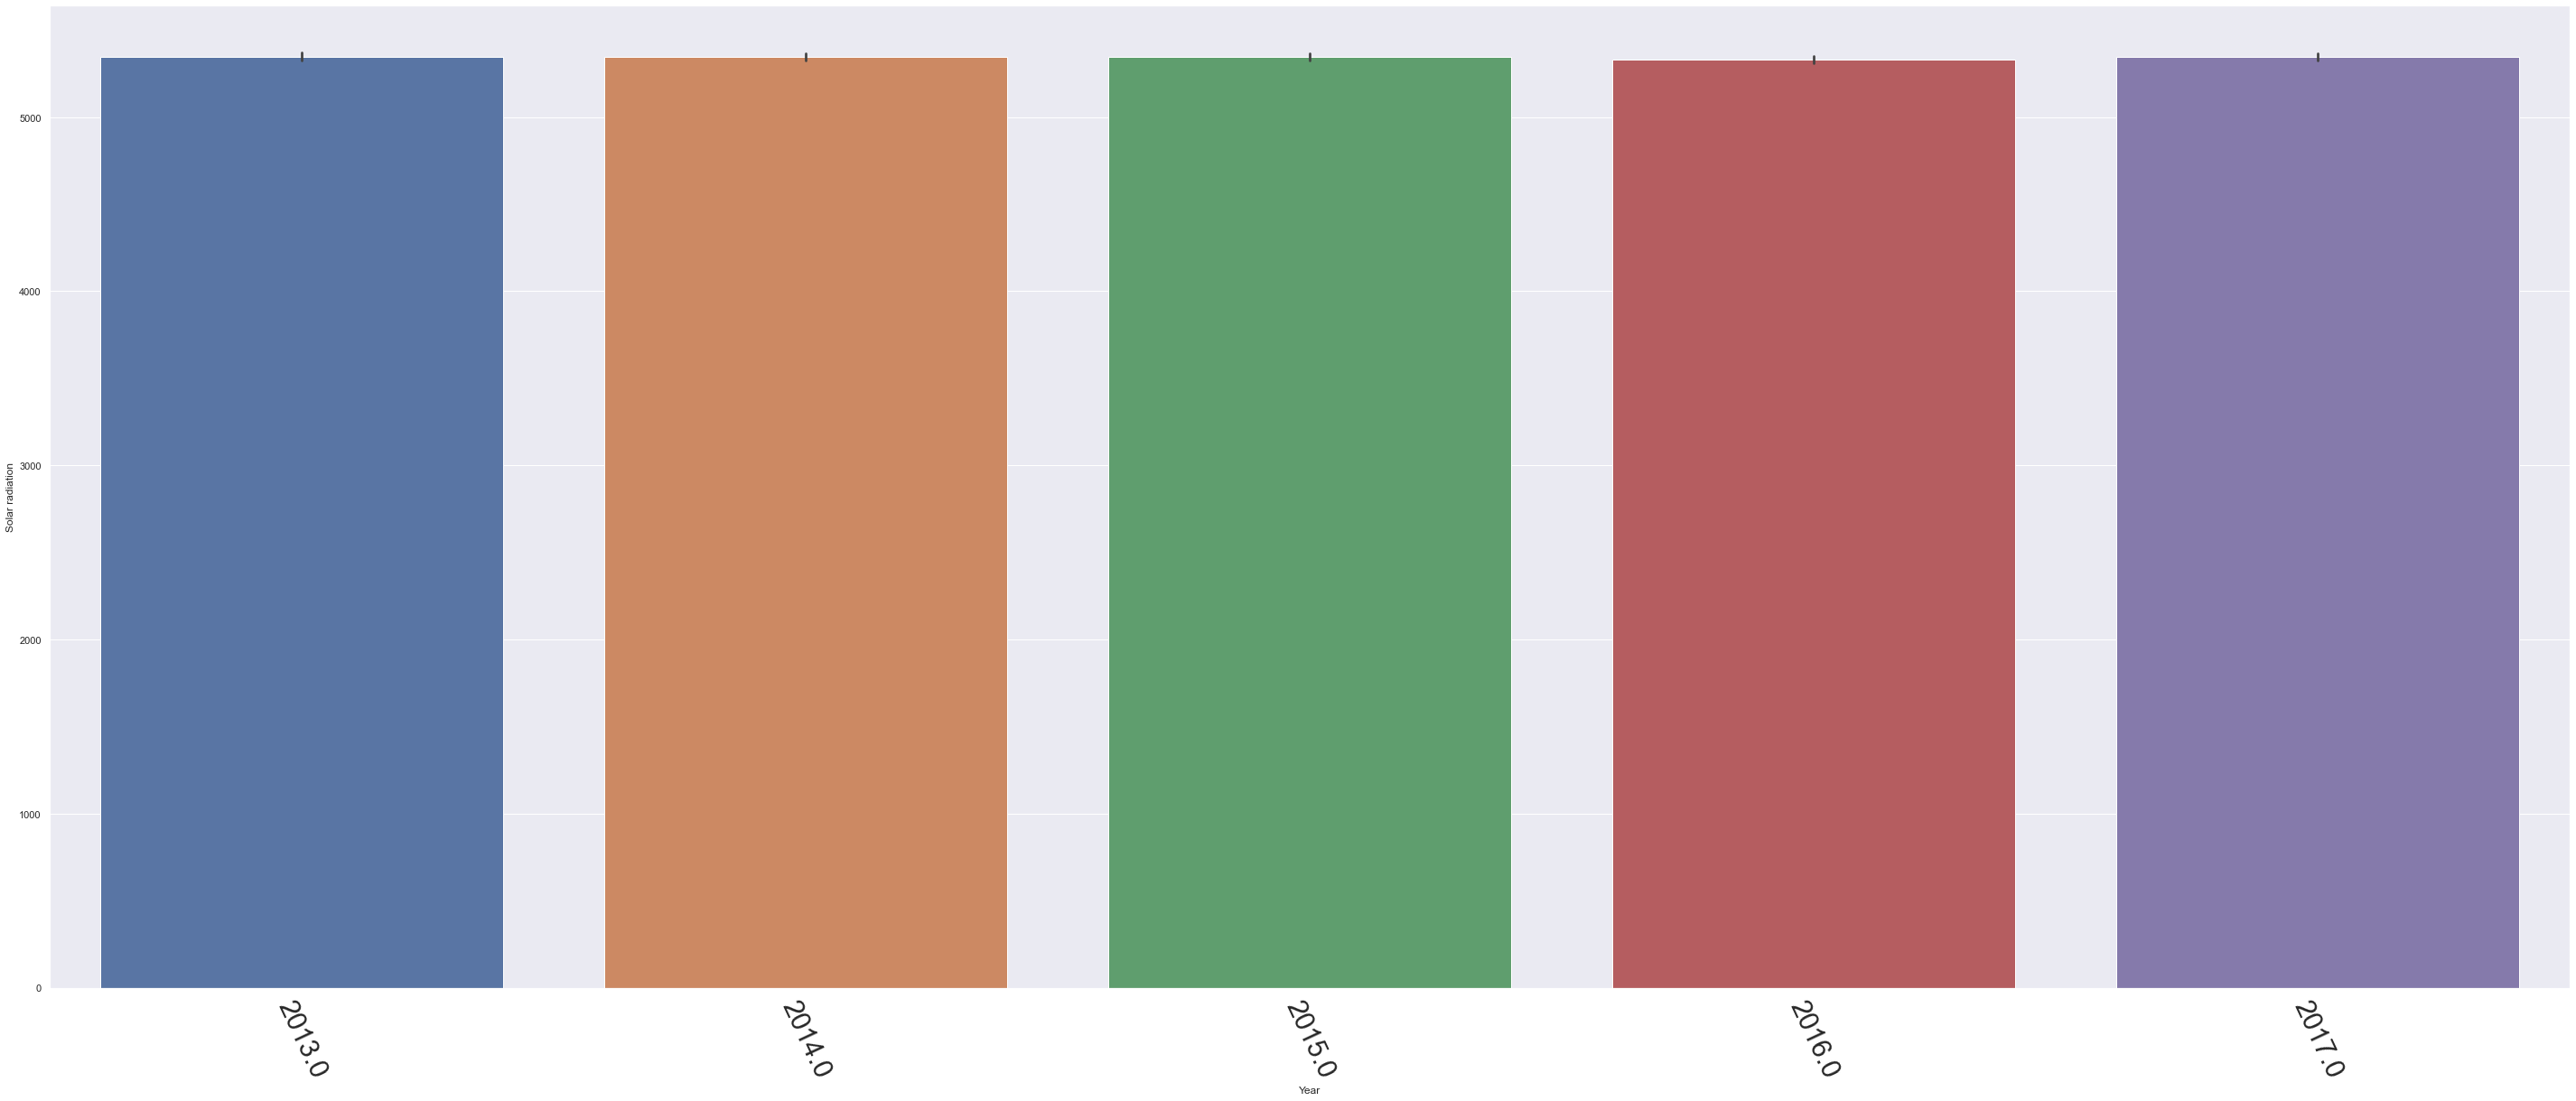

In [24]:
#checking solar raiation through years
plt.figure(figsize = (50,20))
sns.barplot(x = 'Year', y ='Solar radiation', data = df)
plt.xticks(rotation = -65, fontsize = 30)
plt.show()

The solar radiation through the years 2013 to 2017 seems uniform

In [25]:
#checking the correlation
dfcor=df.corr()
dfcor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,0.003526,-0.000161,0.005005,-0.001954,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184,0.001474,0.001211,-0.000996
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,-0.216976,-0.146391,-0.143069,-0.114917,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,0.056002,-0.003266,-0.154366
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,0.090038,-0.004719,-0.046694,0.111577,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,0.037457,-0.010210,-0.115693
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,0.744774,0.688069,0.513937,0.259039,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.002147,-0.053499,-0.063464
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,0.390620,0.224734,0.127242,0.268019,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.144286,-0.039424,-0.012226
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,-0.525380,-0.542728,-0.429739,-0.115659,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,0.020308,-0.022279,-0.161320
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,0.046537,-0.044998,-0.079536,0.034956,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.000564,-0.027050,-0.176772
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,0.257226,0.238155,0.218870,0.141503,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.114114,-0.082267,-0.028312
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,-0.265382,-0.246709,-0.173156,-0.018708,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,0.055898,-0.024944,-0.010504
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,0.779510,0.516698,0.362670,0.446930,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.066233,-0.076819,-0.018974


<AxesSubplot:>

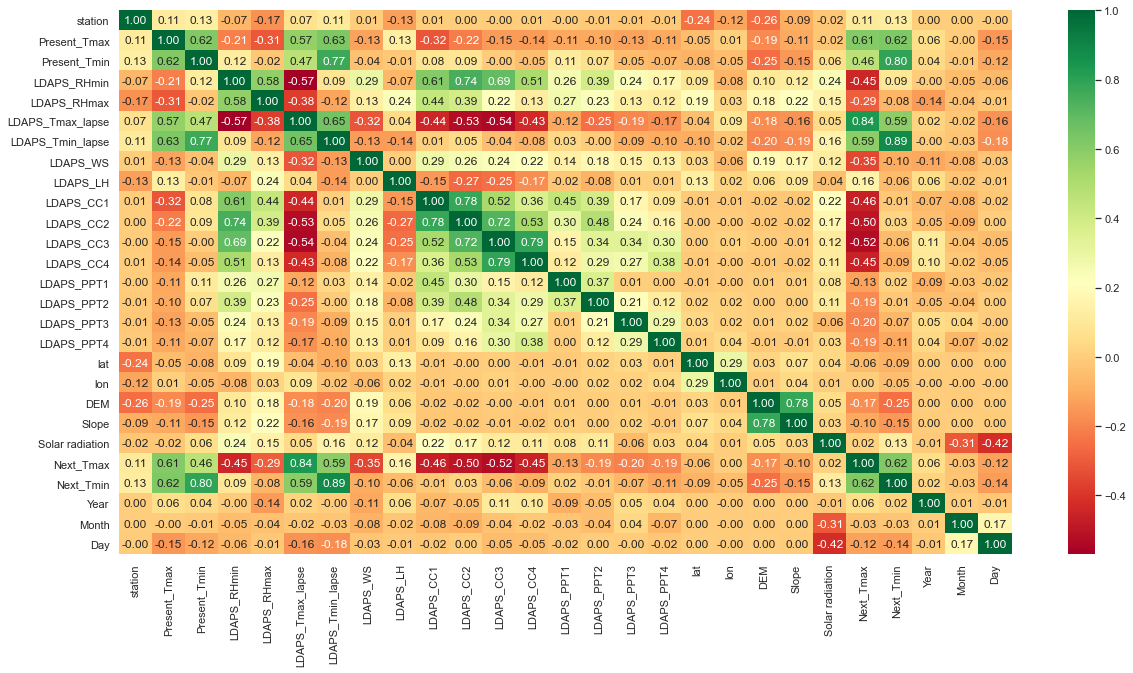

In [26]:
#plotting the correlation

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f',cmap="RdYlGn")

since the number of features are more. Lets check the coorelation to the target variable

In [27]:
dfcor['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.835729
Next_Tmin           0.616629
Present_Tmax        0.610357
LDAPS_Tmin_lapse    0.592119
Present_Tmin        0.463523
LDAPS_LH            0.156779
station             0.107747
Year                0.061211
Solar radiation     0.016145
lon                 0.003502
Month              -0.033684
lat                -0.055367
Slope              -0.104279
Day                -0.122303
LDAPS_PPT1         -0.125954
DEM                -0.174578
LDAPS_PPT2         -0.186722
LDAPS_PPT4         -0.190720
LDAPS_PPT3         -0.203554
LDAPS_RHmax        -0.289788
LDAPS_WS           -0.351107
LDAPS_RHmin        -0.446824
LDAPS_CC4          -0.454039
LDAPS_CC1          -0.459705
LDAPS_CC2          -0.498295
LDAPS_CC3          -0.523061
Name: Next_Tmax, dtype: float64

LDAPS_Tmax_lapse 
Next_Tmin           
Present_Tmax       
LDAPS_Tmin_lapse    
Present_Tmin       
LDAPS_LH            
station             
Year               
Solar radiation     
lon   

These features are having a possitive correlation to the max temperature

Month   
lat                
Slope              
Day               
LDAPS_PPT1        
DEM                
LDAPS_PPT2        
LDAPS_PPT4       
LDAPS_PPT3         
LDAPS_RHmax        
LDAPS_WS         
LDAPS_RHmin       
LDAPS_CC4      
LDAPS_CC1       
LDAPS_CC2    
LDAPS_CC3  

The features with a negative correlation to the min temperature

In [28]:
dfcor['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.886513
Present_Tmin        0.796975
Present_Tmax        0.621048
Next_Tmax           0.616629
LDAPS_Tmax_lapse    0.589963
station             0.128184
Solar radiation     0.125517
LDAPS_RHmin         0.093249
LDAPS_CC2           0.030358
Year                0.021617
LDAPS_PPT1          0.018031
LDAPS_PPT2         -0.012462
LDAPS_CC1          -0.012877
Month              -0.028344
lon                -0.045758
LDAPS_CC3          -0.056490
LDAPS_LH           -0.060392
LDAPS_PPT3         -0.068664
LDAPS_RHmax        -0.076415
lat                -0.085136
LDAPS_CC4          -0.086197
LDAPS_WS           -0.102021
LDAPS_PPT4         -0.114900
Day                -0.135865
Slope              -0.148379
DEM                -0.249303
Name: Next_Tmin, dtype: float64

LDAPS_Tmin_lapse  has the highest possitive correlation
DEM   has the highest negative correlation


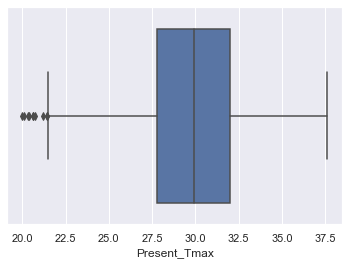

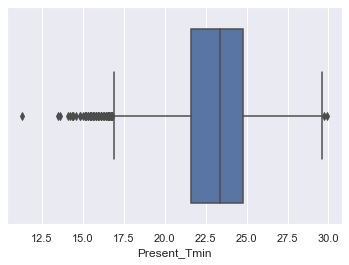

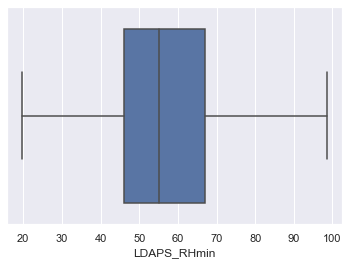

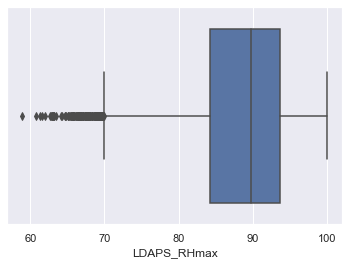

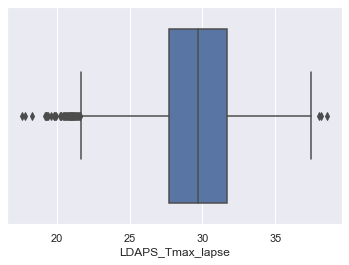

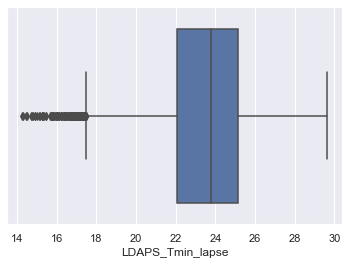

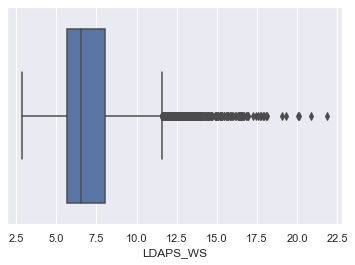

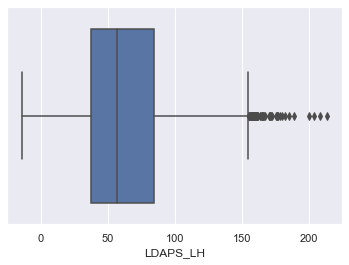

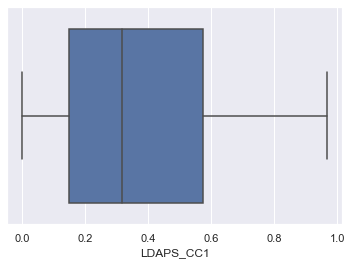

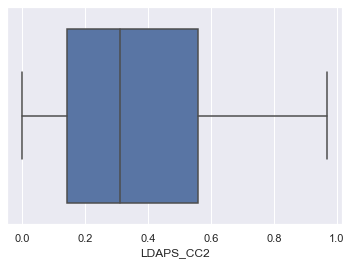

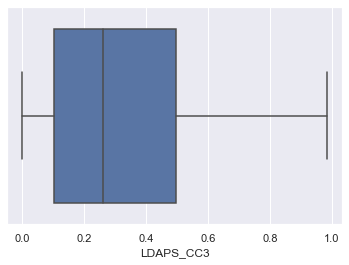

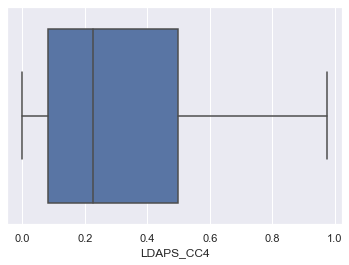

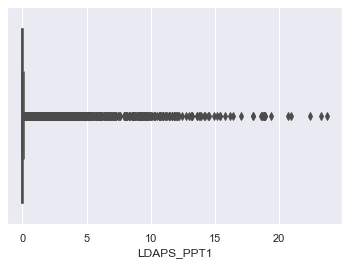

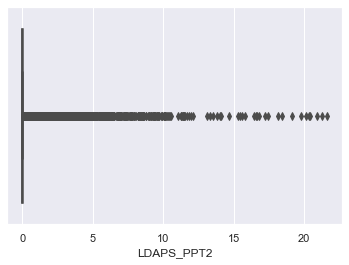

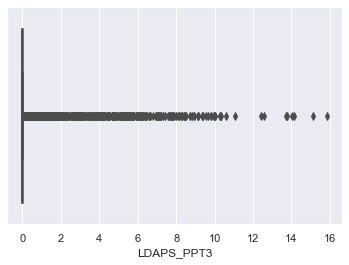

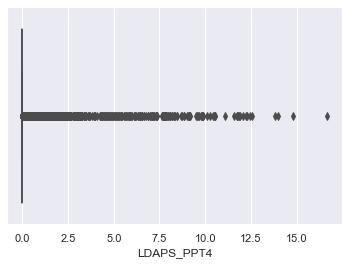

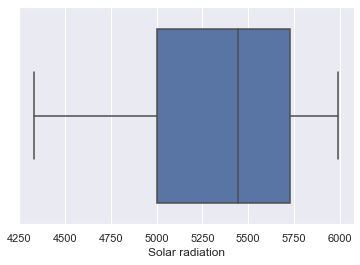

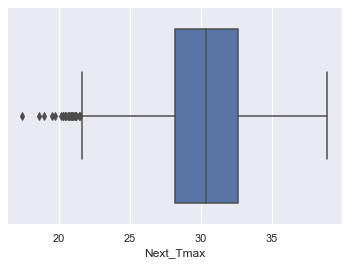

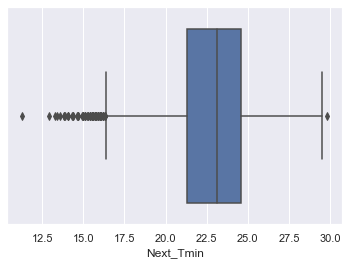

In [29]:
#checking correlation on the continuues columns
num_cols = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 
 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 
 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Solar radiation', 
 'Next_Tmax', 'Next_Tmin']
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

The following columns seems to be having outliers
LDAPS_PPT1
LDAPS_PPT2
LDAPS_PPT3
LDAPS_PPT4
Next_Tmax
Next_Tmin
LDAPS_Tmin_lapse
LDAPS_WS
LDAPS_LH
Present_Tmax
Present_Tmin
LDAPS_RHmax
LDAPS_Tmax_lapse


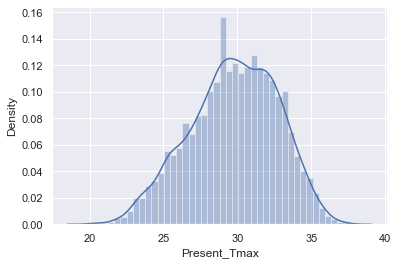

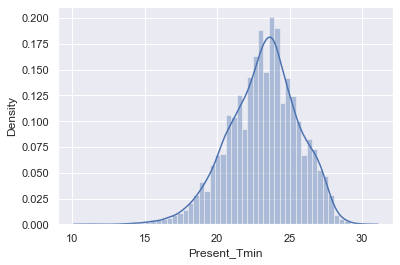

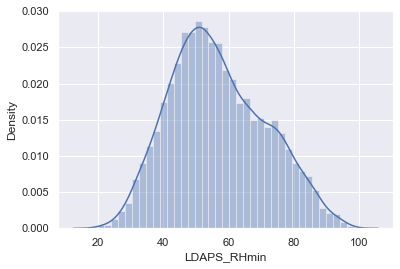

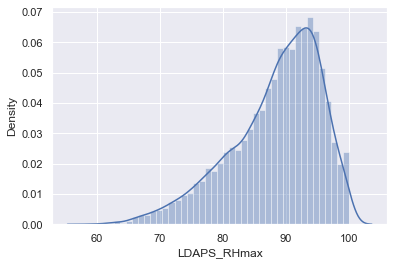

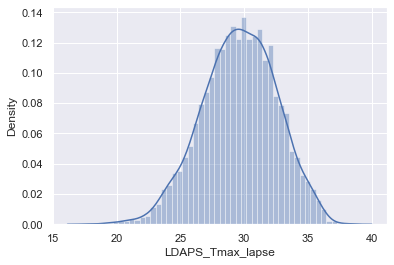

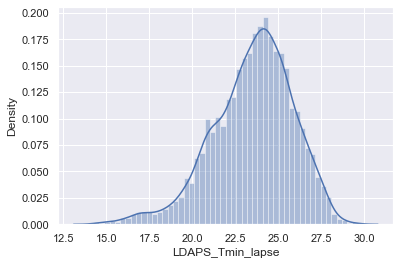

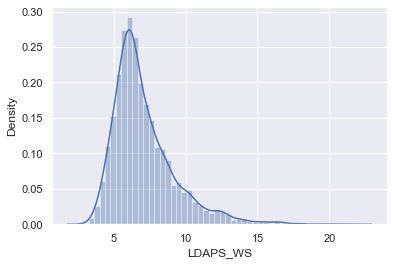

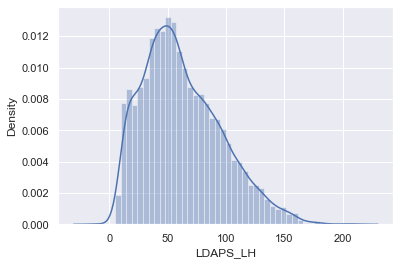

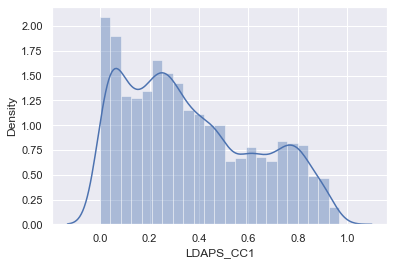

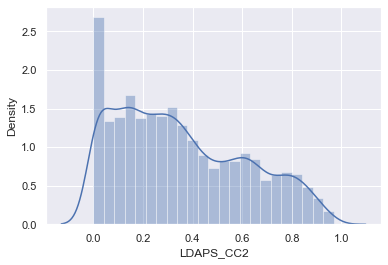

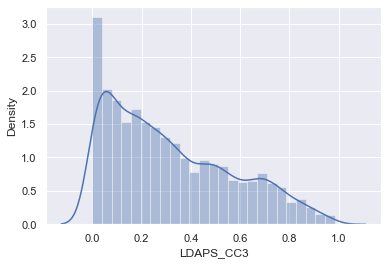

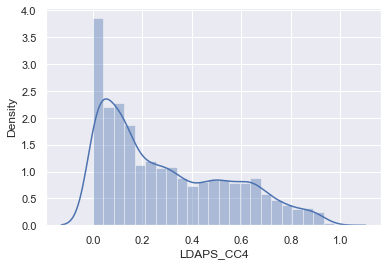

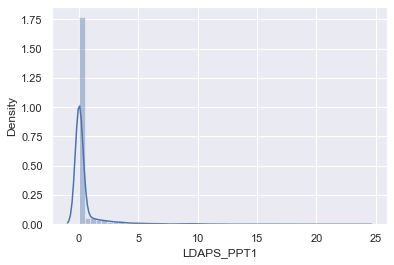

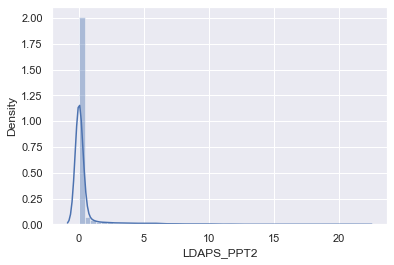

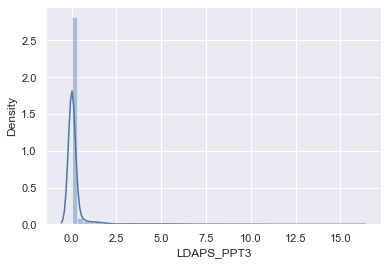

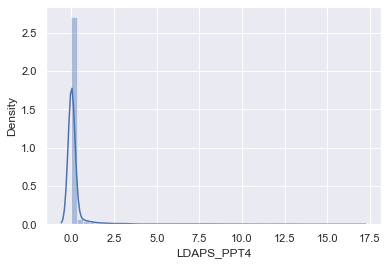

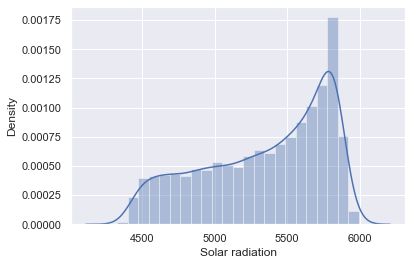

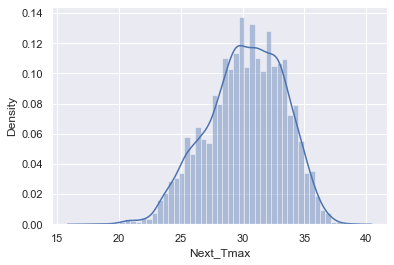

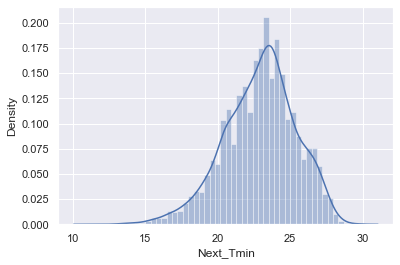

In [30]:
#checking for skewness
for i in num_cols: 
    sns.distplot(df[i], kde = True)
    plt.show()

In [31]:
#handling outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64),
 array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))

In [32]:
df_new = df[(z<3).all(axis = 1)]
df_new.shape

(6739, 27)

In [33]:
((7588-6739)/7588)*100

11.188719030047443

The dataloss is 11 percent, the data loss is significant, however, removing outliers

In [34]:
df=df_new

In [35]:
df.skew()


station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.680725
Day                 0.256528
dtype: float64

In [36]:
df['LDAPS_RHmax']=np.log(df['LDAPS_RHmax'])
df['LDAPS_Tmin_lapse']=np.sqrt(df['LDAPS_Tmin_lapse'])
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])


In [37]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.869912
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.512802
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          1.923134
LDAPS_PPT2          2.341898
LDAPS_PPT3          2.504981
LDAPS_PPT4          2.848397
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.680725
Day                 0.256528
dtype: float64

In [38]:
#splitting x and y

x = df.drop(['Next_Tmax', 'Next_Tmin'], axis = 1)
y = df[['Next_Tmax', 'Next_Tmin']]

In [39]:
#scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [40]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [41]:
#checking the best random state

lr=LinearRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test, predlr)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best r2 score',maxacc,'on random state',maxrs)

best r2 score 0.8080490568025273 on random state 43


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)

In [43]:
x_train.shape

(4717, 25)

In [44]:
y_test.shape

(2022, 2)

In [45]:
y_train.shape

(4717, 2)

In [46]:
x_test.shape

(2022, 25)

In [47]:
def model(mod):
    mod.fit(x_test,y_test)
    ##print(mod.coef_)
    pred=mod.predict(x_test)
    mod.score(x_train,y_train)
    print('\n\n')
    ##print('predicted', pred)
    ##print('actual:',y_test)
    rscr=r2_score(y_test,pred)
    print('r2score:',r2_score(y_test,pred))
    print('Mean squared error',mean_squared_error(y_test,pred))
    print('Root Mean squared error',np.sqrt(mean_squared_error(y_test,pred)))
    print('mean absolute error:',mean_absolute_error(y_test,pred))

In [48]:
#function for cross-validation
from sklearn.model_selection import cross_val_score
def crossval(mod):
    scores = cross_val_score(mod, x_train, y_train, scoring='r2',cv=5)
    print('mean_cross_validation:',scores.mean())

In [49]:
model(LinearRegression())
crossval(LinearRegression())




r2score: 0.8112638106729109
Mean squared error 1.406004257298149
Root Mean squared error 1.1857505038152625
mean absolute error: 0.9004862046698998
mean_cross_validation: 0.7847882880635302


In [50]:
model(Lasso(alpha=0.01))
crossval(Lasso(alpha=0.01))




r2score: 0.8105333548871645
Mean squared error 1.4108475211161593
Root Mean squared error 1.187791025861098
mean absolute error: 0.9023287809921531
mean_cross_validation: 0.7844437434907718


In [51]:
model(Ridge(alpha=0.01))
crossval(Ridge(alpha=0.01))




r2score: 0.8112638106255667
Mean squared error 1.4060042576566234
Root Mean squared error 1.1857505039664218
mean absolute error: 0.9004862180094357
mean_cross_validation: 0.7847883161614881


In [52]:
model(RandomForestRegressor())

crossval(RandomForestRegressor())




r2score: 0.9794221084755943
Mean squared error 0.15075730365974294
Root Mean squared error 0.38827477855217807
mean absolute error: 0.2902720079129585
mean_cross_validation: 0.8791967627339152


In [64]:
model(DecisionTreeRegressor())
crossval(DecisionTreeRegressor())




r2score: 1.0
Mean squared error 0.0
Root Mean squared error 0.0
mean absolute error: 0.0
mean_cross_validation: 0.7136506957142934


In [53]:
model(KNeighborsRegressor())
crossval(KNeighborsRegressor())




r2score: 0.8864170066929318
Mean squared error 0.8236403560830867
Root Mean squared error 0.9075463382566682
mean absolute error: 0.6775272007912939
mean_cross_validation: 0.8589634774510883


In [54]:
model(ElasticNet())
crossval(ElasticNet())




r2score: 0.6702630920606933
Mean squared error 2.407566826496943
Root Mean squared error 1.5516335993065318
mean absolute error: 1.2277274705344543
mean_cross_validation: 0.6269721464857623


selecting kneighbors regressor as the best model based on the cross validation score

### Hyper parameter tuning

In [58]:
from sklearn.model_selection import GridSearchCV
parameters = {'leaf_size' : [1,5,10],
              'n_neighbors' :[3,5,11,19] ,
              'p':[1,2],
              'weights':['uniform','distance']}

In [59]:
knn = KNeighborsRegressor()
rgf = GridSearchCV(knn, parameters,verbose=1)
rgf.fit(x_train, y_train)

print(rgf.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [60]:
knf=KNeighborsRegressor(leaf_size=1, p=1,n_neighbors=5,weights='distance')
knf.fit(x_train,y_train)
knf.score(x_train, y_train)
pred_kn = knf.predict(x_test)
print('Mean absolute error: ', mean_absolute_error(y_test,pred_kn))
print('Mean squared error: ', mean_squared_error(y_test,pred_kn))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_kn)))
print('R2 Score: ', r2_score(y_test,pred_kn))


Mean absolute error:  0.6225769736937607
Mean squared error:  0.6797768687679109
Root mean squared error:  0.8244858208410324
R2 Score:  0.9046271488544021


### We are getting and R2 score of  0.9046271488544021

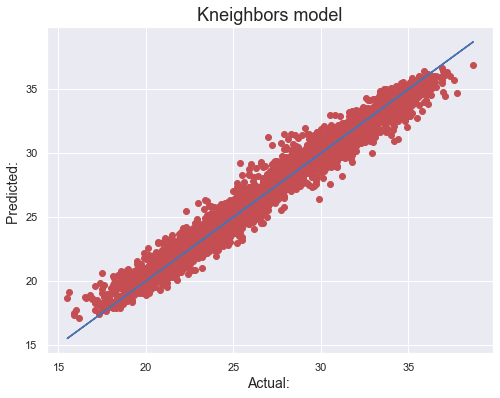

In [61]:
#plotting the model
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_kn, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual: ', fontsize = 14)
plt.ylabel('Predicted: ', fontsize = 14)
plt.title('Kneighbors model', fontsize = 18)
plt.show()

We are getting a pretty neat fit. so saving the above model

### Saving the model

In [62]:
import joblib
joblib.dump(knf, 'Temperature.obj')

['Temperature.obj']

### Re-Imporing Model

In [63]:
final = joblib.load('Temperature.obj')
final.predict(x_train)

array([[30.6, 24. ],
       [30.4, 21. ],
       [30.3, 20.9],
       ...,
       [28.1, 21.7],
       [33.6, 26.8],
       [33.5, 23.7]])

### We are getting and R2 score of 0.9046271488544021